In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sympy import symbols, diff, Eq, solve

In [ ]:
# Task 6 file A

In [7]:
nodes = np.array([0.5, 1, 2, 3, 4])
values = np.array([10.4, 5.8, 3.3, 2.4, 2])

'''
y = ((a + sqrt(x)) / (b * x)) ^ 2
<=>
yi = ((a + sqrt(xi)) / (b * xi)) ^ 2
~~
sqrt(yi) = A * (1/x) + B * (1/sqrt(x)) = f(x)
    where A = a/b and B = 1/b

and we want to minimize phi where
phi = sum((A * (1/xi) + B * (1/sqrt(xi))) - sqrt(yi)) for i in 0..nodes/values.size
minimization is done with taking the derivative
'''

def hw1_A_task6_func(a, b, x):
    return ((a + np.sqrt(x)) / (b * x)) ** 2

A, B = symbols('A, B')
def f(A, B, x):
    return A * (1 / x) + B * (1 / np.sqrt(x))

def phi(A, B):
    sum_of_squares = 0
    for i in range(nodes.size):
        sum_of_squares += (f(A, B, nodes[i]) - np.sqrt(values[i])) ** 2
    return sum_of_squares

equations = [
    Eq(diff(phi(A, B), A), 0),
    Eq(diff(phi(A, B), B), 0)
]
sol = solve(equations)
A = sol[A]
B = sol[B]

b = 1 / B
a = b * A

x_target = 1.6
value_of_x_target = hw1_A_task6_func(a, b, x_target)

In [9]:
print("a is", a, "and b is", b)

a is -0.162787641761994 and b is 0.340015744995022


In [11]:
print("when x is 1.6, then y is", value_of_x_target)

when x is 1.6, then y is 4.10414260315480


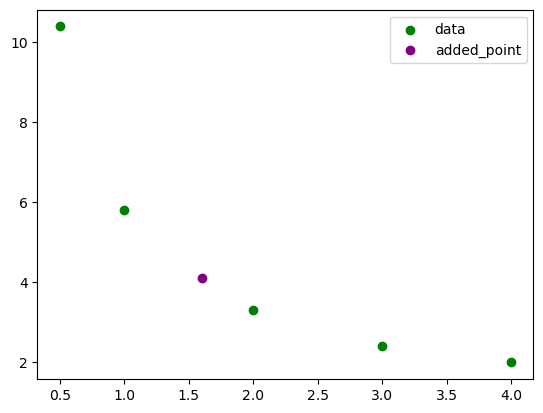

In [15]:
plt.scatter(nodes, values, color='green')
plt.scatter([x_target], [value_of_x_target], color='purple')
plt.legend(['data', 'added_point'])
plt.show()

In [ ]:
# Task 8 file B

In [17]:
nodes = np.array([0.4, 0.8, 1.2, 1.6, 2, 2.3])
values = np.array([800, 975, 1500, 1960, 2900, 3600])

def mnmk_matrix_function(x, y, degree):
    if x.size != y.size:
        raise ValueError('The size of the two arrays should be equal')
    if degree < 0:
        raise ValueError('The degree should not be negative')
    
    points_count = x.size
    n = degree + 1

    # We create the vector of values of the right side of the equation
    values_vector_column = np.array([sum(y[i] * (x[i] ** s) for i in range(points_count)) for s in range(n)])

    # We create the matrix
    matrix = np.ones([n, n])
    for row in range(n):
        for column in range(n):
            matrix[row, column] = sum(x[i] ** (row + column) for i in range(points_count))

    # We solve the vector column of the left side of the equation to the right of the matrix,
    # containing all the coefficients of the desired polinom
    return np.linalg.solve(matrix, values_vector_column)

def hw1_B_task8_func(a, b, x):
    return a * 10 ** (b * x)

'''
y = a * 10 ** (b * x)
~~
y* = c + b * x
    where y* = log10(y) and c = log10(a)

This way we can find the values of a and b
as we can use the mnmk_function to find the coefficients of a linear equation
and the linear equation we will use is the one rewritten above
'''

c, b = mnmk_matrix_function(nodes, np.log10(values), degree_of_linear_functions := 1)

# log10(a) == c  <=>  a == c ** 10
a = 10 ** c

x_axis = np.linspace(nodes.min(), nodes.max(), 200)

In [21]:
print("a is", a, "and b is", b)

a is 546.7356648403321 and b is 0.3557202412812166


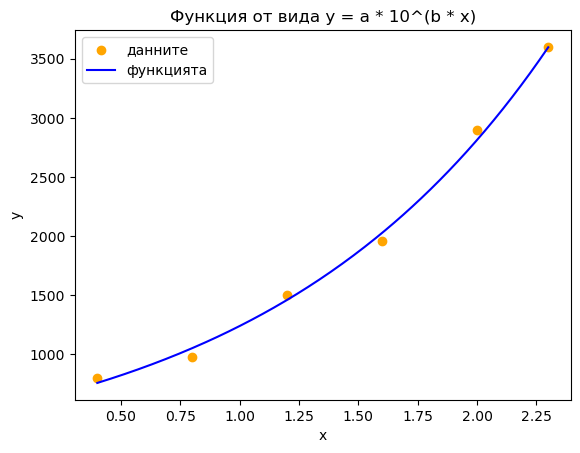

In [19]:
plt.scatter(nodes, values, color='orange')
plt.plot(x_axis, hw1_B_task8_func(a, b, x_axis), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функция от вида y = a * 10^(b * x)')
plt.legend(['данните', 'функцията'])
plt.show()